In [187]:
import pandas as pd
import matplotlib as plt
from matplotlib.colors import ListedColormap
from matplotlib.pylab import randint

import math

from collections import Counter

In [188]:
irrigation_table = pd.read_csv('irrigation.csv')
print(len(irrigation_table.index))

irrigation_table = irrigation_table.drop('crop', axis=1)

irrigation_table.head()

200


,moisture,temp,pump
0,638,16,1
1,522,18,1
2,741,22,1
3,798,32,1
4,690,28,1


In [189]:
irrigation_table.dropna()
len(irrigation_table.index)

200

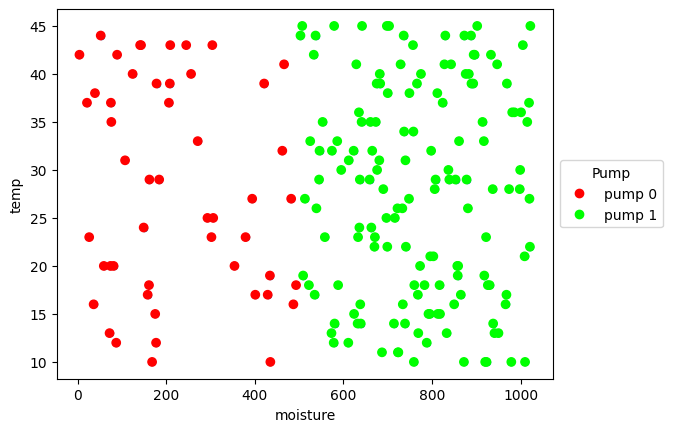

In [190]:
irrigation_table.plot.scatter(x='moisture', y='temp')

cmap = ListedColormap([[1,0,0], [0,1,0]])

sp_names = ['pump 0', 'pump 1']

#use plt.scatter for color customization
scatplot = plt.pyplot.scatter(irrigation_table.moisture, irrigation_table.temp, c=irrigation_table.pump, cmap=cmap)

#add plot legend
plt.pyplot.legend(handles=scatplot.legend_elements()[0], labels=sp_names, title="Pump", loc='center left', bbox_to_anchor=(1.0, 0.5))

In [191]:
irrigation_table_70_train = irrigation_table.sample(frac= 0.6) # add random state to control seed
irrigation_table_30_test = irrigation_table.drop(irrigation_table_70_train.index)

print(f'Train Data: {len(irrigation_table_70_train)}')
print(f'Test Data: {len(irrigation_table_30_test)}')

Train Data: 120
Test Data: 80


In [192]:
count_true = 0
count_false = 0

for i in range(len(irrigation_table_30_test)):
  distances = []

  for j in range(len(irrigation_table_70_train)):
    distances.append([
      math.dist([irrigation_table_30_test.iloc[i]['moisture'], irrigation_table_30_test.iloc[i]['temp']], [irrigation_table_70_train.iloc[j]['moisture'], irrigation_table_70_train.iloc[j]['temp']]),
      irrigation_table_70_train.iloc[j]['pump'].item()
    ])
    
  distances = sorted(distances, key=lambda x: x[0])
  distances = [distances[i][1] for i in range(3)]

  # Counter(distances).most_common(1)[0][0]
  
  if irrigation_table_30_test.iloc[i]['pump'] == Counter(distances).most_common(1)[0][0]:
    count_true += 1
  else:
    count_false +=1
  # print(i, )

print(count_true, count_false)

80 0


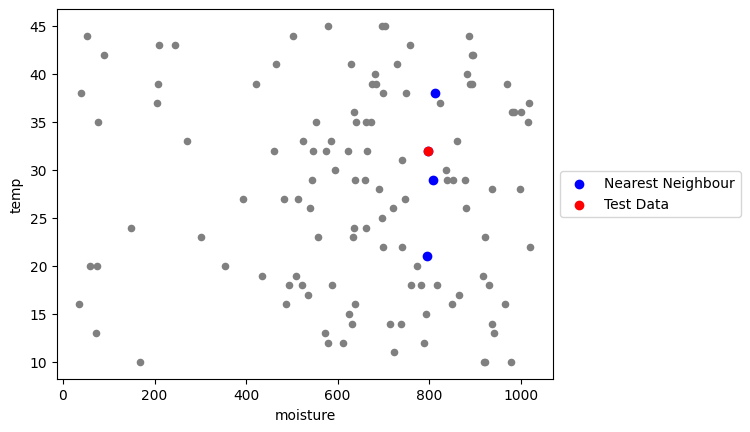

In [193]:
irrigation_table_30_0 = pd.Series(irrigation_table_30_test.iloc[0])
new_table = pd.concat([irrigation_table_70_train, irrigation_table_30_0.to_frame().T], ignore_index=True)

distances = []
for i in range(len(new_table)-1):
    distances.append([
      math.dist([new_table.iloc[-1]['moisture'], new_table.iloc[-1]['temp']], [new_table.iloc[i]['moisture'], new_table.iloc[i]['temp']]),
      new_table.iloc[i]['pump'].item(), i
    ])

distances = sorted(distances, key=lambda x: x[0])

test_list = []
test_list.append(irrigation_table_30_0)

for i in range(3):
    test_list.append(pd.Series(new_table.iloc[distances[i][2]]))

test_table = pd.DataFrame(test_list)

irrigation_table_70_train.plot.scatter(x='moisture', y='temp', c='gray')
near = plt.pyplot.scatter(test_table.moisture, test_table.temp, c="blue")
testdata = plt.pyplot.scatter(test_table.iloc[0].moisture, test_table.iloc[0].temp, c="red")

plt.pyplot.legend((near, testdata),
           ('Nearest Neighbour', 'Test Data'),
           scatterpoints=1,
           loc='center left', bbox_to_anchor=(1.0, 0.5))

# moisture_min, moisture_max = irrigation_table['moisture'].min(), irrigation_table['moisture'].max()
# temp_min, temp_max = irrigation_table['temp'].min(), irrigation_table['temp'].max()

# # Random Plot based on Max and Min of Dataset
# k_moisture_random = randint(moisture_min, moisture_max)
# k_temp_random = randint(temp_min, temp_max)

# # Initialize k
# k_point = [k_moisture_random, k_temp_random]
# print(k_point)

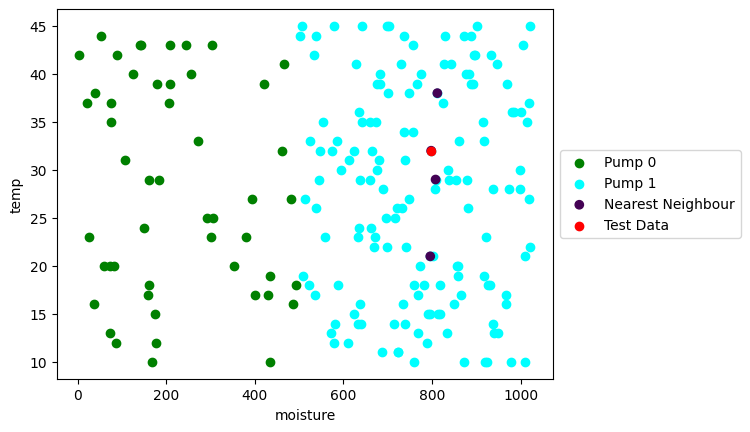

In [194]:
table_pump0 = irrigation_table[irrigation_table['pump'] == 0]
table_pump1 = irrigation_table[irrigation_table['pump'] == 1]

table_pump0.plot.scatter(x='moisture', y='temp')

pump0 = plt.pyplot.scatter(table_pump0.moisture, table_pump0.temp, c="green")
pump1 = plt.pyplot.scatter(table_pump1.moisture, table_pump1.temp, c="cyan")
near = plt.pyplot.scatter(test_table.moisture, test_table.temp, c=test_table.pump)
testdata = plt.pyplot.scatter(test_table.iloc[0].moisture, test_table.iloc[0].temp, c="red")

plt.pyplot.legend((pump0, pump1, near, testdata),
           ('Pump 0','Pump 1','Nearest Neighbour', 'Test Data'),
           scatterpoints=1,
           loc='center left', bbox_to_anchor=(1.0, 0.5))

In [195]:
# k_distances_compute_sorted = sorted(k_distances_compute, key=lambda x: x[0])

# print(f'First three sorted distances from CSV to K using Distance Formula:')
# for i in range(3):
#   print(round(k_distances_compute_sorted[i][0], 2))

In [196]:
# #Evaluate k if n is 3
# k_eval_list_3 = [k_distances_compute_sorted[i][1]['pump'].item() for i in range()]
# print(k_eval_list_3)
# k_identification_3 = Counter(k_eval_list_3).most_common(1)[0][0]
# print(k_identification_3)